# Let's take a look at the European Soccer Database
## What does the data look like?

The [database](https://www.kaggle.com/datasets/hugomathien/soccer) for this project comes in the SQLite database system format. This allows us to use Python module `sqlite3` to run SQL queries directly from this notebook, by writing them within a Python wrapper.

### **Imports**
- `sqlite3` to establish a connection to the database and execute SQL statements.
- `pandas` for data storage, processing and manipulation.
- `numpy` and `scipy` for data analysis and statistical testing. 
- `matplotlib` and `seaborn` for statistical data visualizations.

In [1]:
import sqlite3
import warnings

# suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd # data processing
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

path = "/Users/clintonreid/Downloads/"
database = path + 'database.sqlite'

# Establish a connection to the database
conn = sqlite3.connect(database)

With this connection established, we can store the results of SQL queries executed from this notebook in pandas DataFrames. Remember, we can read SQL queries (and more generally, statements) using `pandas.read_sql`, which can be understood as having inputs `pd.read_sql(sql_query, sql_database_connection)`.

In [2]:
tbl  = pd.read_sql("""SELECT *
                   FROM sqlite_master
                   WHERE type='table';""", conn)

tbl

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


This shows us all tables within the database.

The following command will show all match information in the database.

In [3]:
match = pd.read_sql("""SELECT *
                FROM match;""", conn)

match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What is interesting about the data?

Now that we know what the data looks like, we can take a look at subsets of the data that are interesting and lend themselves well to analysis.

### **Manchester United's Premier League fixtures in 2008/09**
We are able to join tables with relevant information in a query to store the correct data, as seen below.

In [4]:
mun_09 = pd.read_sql("""SELECT match.id,
                     country.name AS country_name,
                     League.name AS league_name,
                     season,
                     date,
                     HT.team_long_name AS home,
                     AT.team_long_name AS away,
                     home_team_goal,
                     away_team_goal
                     FROM Match
                     LEFT JOIN Country on Country.id =  Match.country_id
                     lEFT JOIN League on League.id = Match.league_id
                     LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                     LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                     WHERE season = '2008/2009' and country_name = 'England'
                     AND (home = 'Manchester United' OR away = 'Manchester United')
                     order by date
                     limit 10;""", conn)

mun_09

,id,country_name,league_name,season,date,home,away,home_team_goal,away_team_goal
0,1729,England,England Premier League,2008/2009,2008-08-17 00:00:00,Manchester United,Newcastle United,1,1
1,1846,England,England Premier League,2008/2009,2008-08-25 00:00:00,Portsmouth,Manchester United,0,1
2,2049,England,England Premier League,2008/2009,2008-09-13 00:00:00,Liverpool,Manchester United,2,1
3,2068,England,England Premier League,2008/2009,2008-09-21 00:00:00,Chelsea,Manchester United,1,1
4,2069,England,England Premier League,2008/2009,2008-09-27 00:00:00,Manchester United,Bolton Wanderers,2,0
5,2084,England,England Premier League,2008/2009,2008-10-04 00:00:00,Blackburn Rovers,Manchester United,0,2
6,2089,England,England Premier League,2008/2009,2008-10-18 00:00:00,Manchester United,West Bromwich Albion,4,0
7,2102,England,England Premier League,2008/2009,2008-10-25 00:00:00,Everton,Manchester United,1,1
8,1739,England,England Premier League,2008/2009,2008-10-29 00:00:00,Manchester United,West Ham United,2,0
9,1749,England,England Premier League,2008/2009,2008-11-01 00:00:00,Manchester United,Hull City,4,3


### **Unusual Trends: on what days were Man United more likely to win?**

In [5]:
mun_daysOfWeek = pd.read_sql("""select m.id, m.season, m.date,
                             case when m.home_team_api_id = 10260 then 'home' else 'away' end as HA,
                             case when (m.home_team_api_id = 10260 and m.home_team_goal > m.away_team_goal) or
                             (m.away_team_api_id = 10260 and m.away_team_goal > m.home_team_goal) then 3
                             when (m.home_team_api_id = 10260 and m.home_team_goal < m.away_team_goal) or
                             (m.away_team_api_id = 10260 and m.away_team_goal < m.home_team_goal) then 0
                             else 1 end as points
                             from match m
                             where m.home_team_api_id = 10260 OR m.away_team_api_id = 10260;""", conn)

mun_daysOfWeek

,id,season,date,HA,points
0,1729,2008/2009,2008-08-17 00:00:00,home,1
1,1739,2008/2009,2008-10-29 00:00:00,home,3
2,1749,2008/2009,2008-11-01 00:00:00,home,3
3,1759,2008/2009,2008-11-08 00:00:00,away,0
4,1769,2008/2009,2008-11-15 00:00:00,home,3
...,...,...,...,...,...
299,4723,2015/2016,2015-09-12 00:00:00,home,3
300,4735,2015/2016,2015-09-20 00:00:00,away,3
301,4741,2015/2016,2015-09-26 00:00:00,home,3
302,4749,2015/2016,2015-10-04 00:00:00,away,0


Monday        16
Tuesday       19
Wednesday     24
Thursday       2
Friday         3
Saturday     142
Sunday        98
Name: day_of_week, dtype: int64


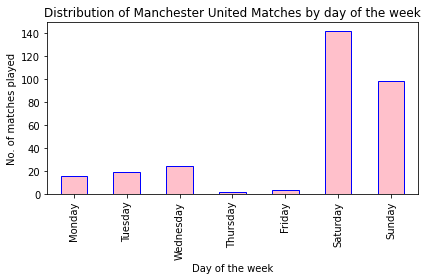

In [6]:
Days = mun_daysOfWeek
Days['date']  = pd.to_datetime(Days['date'])
Days['day_of_week'] = Days['date'].dt.dayofweek
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# map points to results (so we can get day-specific win percentage)
points2results = {3: 'win', 1: 'draw', 0: 'loss'}

Days['result'] = Days['points'].map(points2results)

matches_per_day = Days['day_of_week'].map(day_names).value_counts().reindex(day_names.values())
print(matches_per_day)
matches_per_day.plot(kind='bar', color='pink', edgecolor='blue')

plt.title('Distribution of Manchester United Matches by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('No. of matches played')

# Show the plot
plt.tight_layout()
plt.show()

This is to be expected as Premier league matches are mostly played on the weekends (Sunday and Saturday) to avoid interference with domestic and European cup competitions.

#### **Points generated per day and match outcome percentages per day**

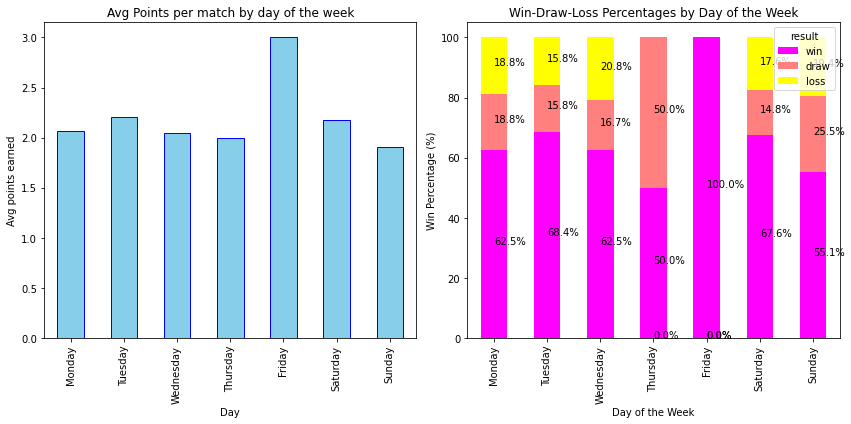

In [7]:
# aggregating data -- points per day mean and win percentages per day
day_stats = Days.groupby('day_of_week').agg({'points': 'mean'})

day_stats = day_stats.reindex(day_names.keys()) # ordering

result_pct = Days.groupby(['day_of_week', 'result']).size().unstack(fill_value=0)

result_pct = result_pct.div(result_pct.sum(axis=1), axis=0) * 100

# points per match
plt.figure(figsize=(12, 6))
plt.subplot(121)
day_stats['points'].plot(kind='bar', color='skyblue', edgecolor='blue')
plt.title('Avg Points per match by day of the week')
plt.xlabel('Day')
plt.ylabel('Avg points earned')
plt.xticks(list(day_names.keys()), list(day_names.values()))

# win/draw/loss percentage
ax = plt.subplot(122)
result_pct[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, colormap='spring', ax=plt.gca())
plt.title('Win-Draw-Loss Percentages by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Win Percentage (%)')
plt.xticks(list(day_names.keys()), list(day_names.values()))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    percentage = height
    # percentage = height / sum(result_pct[['win', 'draw', 'loss']].loc[y]) * 100
    ax.annotate(f'{percentage:.1f}%', (x + width/2, y + height/2), ha='left')
plt.tight_layout()
plt.show()

Manchester United are undefeated in all 8 seasons from 2008/09 to 2015/16 on Thursdays and Friday. Perhaps even more surprising is that during that time, they only played 5 games on those days. Outliers aside, we find that Manchester United's average performance over the 8 years didn't depend much on the day at all, notably only drawing more (and hence winning less) on Sundays. 


This is likely an effect of more exciting fixtures (closer games against harder opponents) being played on Sundays due to broadcasting considerations. A deeper dive into fixture history across the Premier League can confirm this.

## **Season Statistics: Manchester United, Goals Scored and Conceded, Win/Draw/Loss Percentages**

In [8]:
# Let's compare these seasons in terms of goals scored, goals conceded, and win/draw/loss percentages
# some interesting home vs away form analysis possible with this summary

SummaryBySeason = pd.read_sql("""SELECT season,
                            SUM(CASE WHEN m.home_team_api_id = 10260 THEN m.home_team_goal END) AS home_scored,
                            SUM(CASE WHEN m.home_team_api_id = 10260 THEN m.away_team_goal END) AS home_conceded,
                            SUM(CASE WHEN m.away_team_api_id = 10260 THEN m.away_team_goal END) AS away_scored,
                            SUM(CASE WHEN m.away_team_api_id = 10260 THEN m.home_team_goal END) AS away_conceded,
                            SUM(CASE WHEN m.home_team_api_id = 10260 AND m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) AS home_wins,
                            SUM(CASE WHEN m.home_team_api_id = 10260 AND m.home_team_goal < m.away_team_goal THEN 1 ELSE 0 END) AS home_losses,
                            SUM(CASE WHEN m.home_team_api_id = 10260 AND m.home_team_goal = m.away_team_goal THEN 1 ELSE 0 END) As home_draws,
                            SUM(CASE WHEN m.away_team_api_id = 10260 AND m.home_team_goal < m.away_team_goal THEN 1 ELSE 0 END) AS away_wins,
                            SUM(CASE WHEN m.away_team_api_id = 10260 AND m.home_team_goal > m.away_team_goal THEN 1 ELSE 0 END) AS away_losses,
                            SUM(CASE WHEN m.away_team_api_id = 10260 AND m.home_team_goal = m.away_team_goal THEN 1 ELSE 0 END) As away_draws
                            FROM Match m
                            LEFT JOIN Team AS HT on HT.team_api_id = m.home_team_api_id
                            LEFT JOIN Team AS AT on AT.team_api_id = m.away_team_api_id
                            WHERE m.home_team_api_id = 10260 OR m.away_team_api_id = 10260
                            GROUP BY season;""", conn
                            )
SummaryBySeason

,season,home_scored,home_conceded,away_scored,away_conceded,home_wins,home_losses,home_draws,away_wins,away_losses,away_draws
0,2008/2009,43,13,25,11,16,1,2,12,3,4
1,2009/2010,52,12,34,16,16,2,1,11,5,3
2,2010/2011,49,12,29,25,18,0,1,5,4,10
3,2011/2012,52,19,37,14,15,2,2,13,3,3
4,2012/2013,45,19,41,24,16,3,0,12,2,5
5,2013/2014,29,21,35,22,9,7,3,10,5,4
6,2014/2015,41,15,21,22,14,3,2,6,5,8
7,2015/2016,27,9,22,26,12,2,5,7,8,4


In [9]:
condensedSummary = pd.DataFrame()
condensedSummary['total_games_played'] = SummaryBySeason['home_wins'] + SummaryBySeason['home_losses'] + SummaryBySeason['home_draws'] + SummaryBySeason["away_wins"] + SummaryBySeason["away_losses"] + SummaryBySeason["away_draws"]
condensedSummary["goals_scored"] = SummaryBySeason["home_scored"] + SummaryBySeason["away_scored"]
condensedSummary["goals_conceded"] = SummaryBySeason["home_conceded"] + SummaryBySeason["away_conceded"]
condensedSummary["win_pct"] = (SummaryBySeason["home_wins"] + SummaryBySeason["away_wins"]) * 100/condensedSummary['total_games_played']
condensedSummary["draw_pct"] = (SummaryBySeason["home_draws"] + SummaryBySeason["away_draws"]) * 100/condensedSummary['total_games_played']
condensedSummary["loss_pct"] = (SummaryBySeason["home_losses"] + SummaryBySeason["away_losses"]) * 100/condensedSummary['total_games_played']
condensedSummary

,total_games_played,goals_scored,goals_conceded,win_pct,draw_pct,loss_pct
0,38,68,24,73.684211,15.789474,10.526316
1,38,86,28,71.052632,10.526316,18.421053
2,38,78,37,60.526316,28.947368,10.526316
3,38,89,33,73.684211,13.157895,13.157895
4,38,86,43,73.684211,13.157895,13.157895
5,38,64,43,50.000000,18.421053,31.578947
6,38,62,37,52.631579,26.315789,21.052632
7,38,49,35,50.000000,23.684211,26.315789


In [10]:
# allow easy entry of SQL queries
def dbsql(str, con=conn):

    data = pd.read_sql('''{}'''.format(str), con)
    return data

In [11]:
dbsql('SELECT * FROM match')

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Margin of victory**

What leagues are more likely to have a big victory, once there is a winner?

In [12]:
num_games = dbsql("""SELECT c.name AS country,
                  m.season AS season,
                  COUNT(DISTINCT(m.match_api_id)) AS 'no. of games played'
                  FROM match as m
                  LEFT JOIN country as c
                  ON m.country_id = c.id
                  GROUP BY Country, Season""")
num_games # total number of games played in each country in each season

,country,season,no. of games played
0,Belgium,2008/2009,306
1,Belgium,2009/2010,210
2,Belgium,2010/2011,240
3,Belgium,2011/2012,240
4,Belgium,2012/2013,240
...,...,...,...
83,Switzerland,2011/2012,162
84,Switzerland,2012/2013,180
85,Switzerland,2013/2014,180
86,Switzerland,2014/2015,180


In [13]:
marginOfVictory = dbsql("""SELECT c.name AS country,
                        m.season AS season,
                        SUM(CASE WHEN m.home_team_goal != m.away_team_goal THEN ABS(m.home_team_goal - m.away_team_goal) END) AS 'Margin of victory',
                        SUM(CASE WHEN m.home_team_goal != m.away_team_goal THEN 1 END) AS 'matches with a winner'
                        FROM match as m
                        LEFT JOIN country as c
                        ON m.country_id = c.id
                        GROUP BY Country, Season
                        """)
marginOfVictory

,country,season,Margin of victory,matches with a winner
0,Belgium,2008/2009,427,239
1,Belgium,2009/2010,281,159
2,Belgium,2010/2011,329,178
3,Belgium,2011/2012,315,175
4,Belgium,2012/2013,343,181
...,...,...,...,...
83,Switzerland,2011/2012,227,122
84,Switzerland,2012/2013,262,135
85,Switzerland,2013/2014,256,139
86,Switzerland,2014/2015,241,132


In [14]:
# seasons with highest (and lowest) average margin of victory
avg_MOV = marginOfVictory
avg_MOV['Avg_MOV'] = round(marginOfVictory['Margin of victory']/marginOfVictory['matches with a winner'], 3)
avg_MOV

# Find individual seasons with the highest and lowest margins of victories
highestMOV = avg_MOV.sort_values('Avg_MOV', ascending=False).head(20)
lowestMOV = avg_MOV.sort_values('Avg_MOV', ascending=False).tail(20)

highestMOV

,country,season,Margin of victory,matches with a winner,Avg_MOV
43,Netherlands,2011/2012,537,243,2.210
44,Netherlands,2012/2013,482,228,2.114
42,Netherlands,2010/2011,491,235,2.089
40,Netherlands,2008/2009,476,230,2.070
81,Switzerland,2009/2010,307,151,2.033
29,Germany,2013/2014,489,242,2.021
80,Switzerland,2008/2009,270,135,2.000
41,Netherlands,2009/2010,488,244,2.000
27,Germany,2011/2012,453,227,1.996
47,Netherlands,2015/2016,462,232,1.991


In [15]:
lowestMOV

,country,season,Margin of victory,matches with a winner,Avg_MOV
60,Portugal,2012/2013,309,179,1.726
54,Poland,2014/2015,300,174,1.724
32,Italy,2008/2009,488,285,1.712
50,Poland,2010/2011,308,180,1.711
14,England,2014/2015,491,287,1.711
21,France,2013/2014,465,272,1.710
22,France,2014/2015,499,292,1.709
61,Portugal,2013/2014,307,180,1.706
65,Scotland,2009/2010,281,165,1.703
52,Poland,2012/2013,300,177,1.695


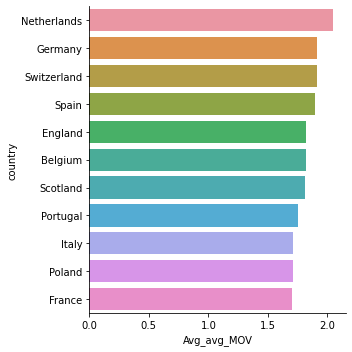

In [16]:
# average margin of victory overall
df = avg_MOV.groupby(['country']).sum()
df['Avg_avg_MOV'] = round(df['Avg_MOV']/8, 3)
df.columns

# PLOT MOV INFO per league in descending order
df = df.reset_index()
df.sort_values('Avg_avg_MOV', inplace=True, ascending=False)
df
sns.catplot(data = df, x='Avg_avg_MOV', y='country', kind='bar')

In [17]:
df

,country,Margin of victory,matches with a winner,Avg_MOV,Avg_avg_MOV
5,Netherlands,3830,1867,16.404,2.050
3,Germany,3543,1851,15.309,1.914
10,Switzerland,2060,1076,15.294,1.912
9,Spain,4418,2336,15.135,1.892
1,England,4120,2257,14.592,1.824
0,Belgium,2371,1303,14.543,1.818
8,Scotland,2492,1377,14.464,1.808
7,Portugal,2677,1519,14.028,1.754
4,Italy,3807,2221,13.716,1.714
6,Poland,2380,1395,13.654,1.707


We find that the Eredivisie (Netherlands), Bundesliga (Germany) and La Liga (Spain) have bigger margins of victory (excluding draws, although including draws does not change the trend!), whereas Ligue 1 (France), Serie A (Italy) and Ekstraklasa (Poland) had more games where one team eked past another.

### Similar Questions

Similar analyses can be done fairly easily to determine the highest-scoring teams, leagues or seasons, or stingiest defences in Europe throughout the period, and many more...

## What can we learn from the data?

The player_attrbutes data allows us to address some interesting phenomena in world football.

- are left footed players more creative or technicaly gifted? Break this down to identifying whether or not there is a significant statistical difference between the distributions of chosen stats of dribbling, long passing and ball control between right and left footed players?
- Future: are left footed player overrepresented in particular birth months? We already know left-footers are generally overrepresented in football! (21% of one-footed players in the dataset vs 11.7% of one-footed people in the world)

In [18]:
# dbsql('select * from information_schema.columns where table_name = player_attributes')
dbsql('pragma table_info(player_attributes)') # get all column names from player attributes
# dbsql('pragma table_info(player)') 

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,0,None,1
1,1,player_fifa_api_id,INTEGER,0,None,0
2,2,player_api_id,INTEGER,0,None,0
3,3,date,TEXT,0,None,0
4,4,overall_rating,INTEGER,0,None,0
5,5,potential,INTEGER,0,None,0
6,6,preferred_foot,TEXT,0,None,0
7,7,attacking_work_rate,TEXT,0,None,0
8,8,defensive_work_rate,TEXT,0,None,0
9,9,crossing,INTEGER,0,None,0


In [19]:
# dbsql("Select * from player where player_name = 'Lionel Messi'")
footed = dbsql("""select distinct p.player_api_id as id,
      p.player_name as player,
      p.birthday as birthday,
      q.preferred_foot as foot,
      max(q.dribbling) as dribbling,
      max(q.long_passing) as lng,
      max(q.ball_control) as touch
      from player p
      left join player_attributes as q on p.player_api_id = q.player_api_id
      group by p.player_api_id, q.preferred_foot;
      """)
footed

""" NEEDS SOME CLEANING: some players have used both feet (remove them), player stats with NaN should also be removed, remove None for foot"""

' NEEDS SOME CLEANING: some players have used both feet (remove them), player stats with NaN should also be removed, remove None for foot'

In [20]:
f = footed.dropna() #remove all nans and nones
player_foot_stats = f.drop_duplicates(subset = ['id', 'player'], keep = False) # drop all duplicates -- players who use both feet

In [21]:
player_foot_stats
group = player_foot_stats.groupby(player_foot_stats['foot'] == 'left')

leftStats = group.get_group(True)
rightStats = group.get_group(False)

In [22]:
leftStats
rightStats
pd.set_option('display.max_columns', None)
display(player_foot_stats[player_foot_stats.columns.difference(['id'])].groupby("foot").describe())

dribbling                                                         lng  \
          count       mean        std   min   25%   50%   75%   max   count   
foot                                                                          
left     2081.0  64.674195  13.905054  11.0  58.0  67.0  74.0  97.0  2081.0   
right    7858.0  60.382667  17.575026   6.0  52.0  65.0  73.0  97.0  7858.0   

                                                            touch             \
            mean        std   min   25%   50%   75%   max   count       mean   
foot                                                                           
left   62.489188  12.150063  20.0  56.0  64.0  71.0  94.0  2081.0  67.530514   
right  60.046704  13.795096  12.0  53.0  62.0  70.0  97.0  7858.0  64.230593   

                                                
             std   min   25%   50%   75%   max  
foot                                            
left   11.805725  13.0  63.0  69.0  75.0  97.0  
right  15.831114   9.0  60.0  68.0  75.0  97.0

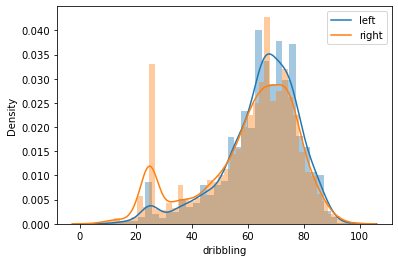

In [23]:
# address some interesting phenomena in football --
"""are left footed players more creative?/more technically gifted? might have to account for goalkeepers
      --- are left footed players more likely to have higher dribbling, long passing and ball control stats
      are left footed players overrepresented in particular birth months?

P(stat = S|LF) = P(LF|stat=S)P(stat=S)/P(LF)
"""

x = sns.distplot(a=leftStats.dribbling)
y = sns.distplot(a=rightStats.dribbling)
plt.legend(labels=['left', 'right'])
plt.show()

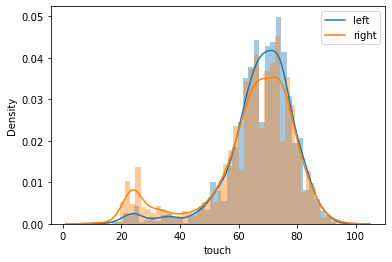

In [24]:
x = sns.distplot(a=leftStats.touch)
y = sns.distplot(a=rightStats.touch)
plt.legend(labels=['left', 'right'])
plt.show()

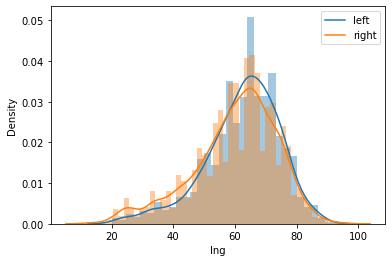

In [25]:
x = sns.distplot(a=leftStats.lng)
y = sns.distplot(a=rightStats.lng)
plt.legend(labels=['left', 'right'])
plt.show()

### **Statistical Comparisons**

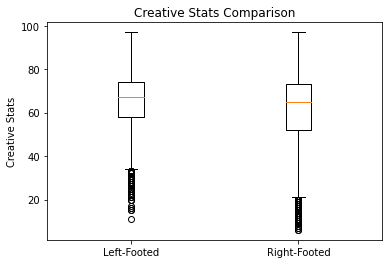

statistically significant difference between left and right footed players.


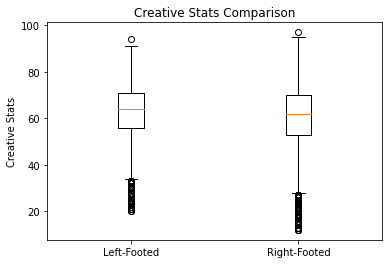

statistically significant difference between left and right footed players.


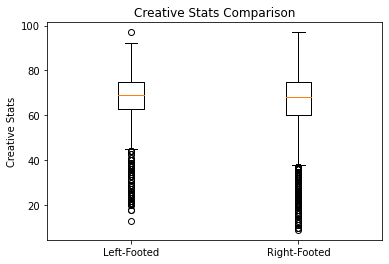

statistically significant difference between left and right footed players.


In [26]:
# STATISTICAL COMPARISONS
ldrib_mean, rdrib_mean = 64.674195, 60.382667
llongPass_mean, rlongPass_mean = 62.489188, 60.046704
lTouch_mean, rTouch_mean = 67.530514, 64.230593

stat = ['dribbling', 'lng', 'touch']
var_dict = {'dribbling': [ldrib_mean, rdrib_mean],
            'lng': [llongPass_mean, rlongPass_mean],
            'touch': [lTouch_mean, rTouch_mean]}

# Cohen's d --
for i in stat:
    pooled_std = np.sqrt(((len(leftStats[i]) - 1) * np.var(leftStats[i]) + (len(rightStats[i]) - 1) * np.var(rightStats[i]))/(len(leftStats[i]) + len(rightStats[i]) - 2))
    cohens = (var_dict[i][0] - var_dict[i][1]) / pooled_std
    # print(cohens)

    t, p_value = stats.ttest_ind(leftStats[i], rightStats[i], equal_var=False)
    # print(cohens, p_value)

    plt.boxplot([leftStats[i], rightStats[i]], labels=['Left-Footed', 'Right-Footed'])
    plt.title('Creative Stats Comparison')
    plt.ylabel('Creative Stats')
    plt.show()


    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("statistically significant difference between left and right footed players.")
    else:
        print("no statistically significant difference between left and right footed players.")


### **What does this mean?**
Although we found a *statistically* significant difference between the distributions of stats for left-footed and right-footed players, there was no *practically* significant difference between them, meaning there is essentially no evident real-world creativity bias towards left-footed players. 

We also acknowledge the presence of left-footed outliers, such as Lionel Messi, as well as the potential effect of player position on these stats. Goalkeepers (and to a lesser extent, defenders) are less likely to have great creative stats. Is there an imbalance of footedness among goalkeepers versus other positions?

## **Miscellaneous**

In [27]:
dbsql("Select * from player where player_name = 'Jan Oblak'")

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,4636,177126,Jan Oblak,200389,1993-01-07 00:00:00,185.42,192


In [28]:
dbsql('select * from player_attributes where player_api_id = 177126')

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,77095,200389,177126,2016-02-11 00:00:00,82,86,right,medium,medium,13,11,15,29,13,12,13,14,26,16,43,60,67,79,49,22,76,41,78,12,44,19,11,55,11,14,12,18,79,84,73,84,83
1,77096,200389,177126,2016-01-28 00:00:00,82,86,right,medium,medium,13,11,15,29,13,12,13,14,26,16,43,60,67,79,49,22,76,41,78,12,44,19,11,55,11,14,12,18,79,84,73,84,83
2,77097,200389,177126,2015-09-21 00:00:00,81,86,right,medium,medium,13,11,15,29,13,12,13,14,26,16,43,60,67,78,49,22,76,41,78,12,44,19,11,55,11,14,12,18,77,84,72,83,82
3,77098,200389,177126,2014-10-02 00:00:00,77,82,right,medium,medium,25,25,25,28,25,25,25,25,25,26,43,60,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,74,83,67,79,77
4,77099,200389,177126,2014-09-18 00:00:00,77,82,right,medium,medium,25,25,25,28,25,25,25,25,25,26,43,60,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,74,83,67,79,77
5,77100,200389,177126,2014-05-09 00:00:00,77,85,right,medium,medium,25,25,25,28,25,25,25,25,25,26,43,60,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,74,83,67,79,77
6,77101,200389,177126,2014-04-25 00:00:00,77,85,right,medium,medium,25,25,25,28,25,25,25,25,25,26,43,47,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,74,82,68,78,77
7,77102,200389,177126,2014-02-14 00:00:00,76,85,right,medium,medium,25,25,25,25,25,25,25,25,25,26,43,47,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,73,82,65,77,76
8,77103,200389,177126,2014-01-24 00:00:00,75,85,right,medium,medium,25,25,25,25,25,25,25,25,25,26,35,47,67,74,49,25,76,41,78,25,43,25,25,25,25,25,25,25,72,81,65,77,74
9,77104,200389,177126,2014-01-17 00:00:00,75,85,right,medium,medium,25,25,25,25,25,25,25,25,25,26,35,47,67,74,49,25,76,41,77,25,43,25,25,25,25,25,25,25,72,81,65,77,74


In [29]:
dbsql('select * from league')
dbsql('select * from team')
dbsql('select * from team_attributes')

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,Organised,52,Normal,48,Normal,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,Organised,47,Normal,52,Normal,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


## **Limitations of the Data**
- No good relation/link established between player information, and team, league or match information. This relationship would make it easier to analyse player impact on match outcomes
- No link between teams and country independent of match data, need to join tables to get that relationshup

In [30]:
pd.set_option('display.max_columns', None)
dbsql("select * from match where league_id = 21518")

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,21518,21518,21518,2008/2009,1,2008-08-30 00:00:00,530023,10267,8661,3,0,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,5,4,6,5,4,6.0,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,5,7,7,9,11,11.0,19435.0,34007.0,34029.0,37479.0,34008.0,32761.0,30666.0,2802.0,37459.0,41468.0,30909.0,33845.0,24131.0,33856.0,33849.0,33861.0,38160.0,37491.0,38398.0,37411.0,21414.0,25574.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><corners>1</corners></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>53</comment><event...,1.70,3.60,5.25,1.65,3.35,5.00,1.70,3.3,4.50,1.62,3.50,4.50,NaN,NaN,NaN,1.67,3.30,4.50,1.73,3.50,5.00,1.65,3.40,4.50,1.75,3.30,5.00,1.67,3.40,5.00
1,21519,21518,21518,2008/2009,1,2008-08-31 00:00:00,530084,8371,10205,1,1,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,2,4,6,8,4,6.0,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,7,7,7,7,10,10.0,24591.0,72541.0,33865.0,11778.0,38521.0,42369.0,33870.0,38424.0,30907.0,33641.0,108809.0,41466.0,30279.0,56678.0,38458.0,40599.0,37436.0,38746.0,30958.0,38362.0,38551.0,31020.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,2.80,3.30,2.50,2.90,3.25,2.20,2.80,3.1,2.30,2.75,3.00,2.38,NaN,NaN,NaN,2.62,3.20,2.30,2.75,3.20,2.60,2.90,3.20,2.25,2.75,3.20,2.50,2.80,3.25,2.30
2,21520,21518,21518,2008/2009,1,2008-08-31 00:00:00,530085,9783,8633,2,1,1,2,4,8,6,2,4,6,8,4,6,1,2,4,6,8,4,6,3,5,7,5.0,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,6,6,8,8,8,11.0,33018.0,111190.0,37451.0,41167.0,34104.0,37447.0,30271.0,33758.0,31045.0,37441.0,34956.0,30657.0,30962.0,25921.0,30670.0,28467.0,37259.0,32765.0,25759.0,30655.0,30834.0,34602.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>44</comment><event...,3.50,3.30,2.10,3.90,3.25,1.85,3.20,3.1,2.10,3.20,3.20,2.00,NaN,NaN,NaN,3.30,3.25,1.95,4.00,3.50,1.90,3.25,3.25,2.00,3.50,3.20,2.10,3.25,3.25,2.10
3,21521,21518,21518,2008/2009,1,2008-08-31 00:00:00,530086,8388,8634,1,0,1,2,4,6,8,2,4,6,8,5,5,1,2,4,6,8,3,5,7,3,5,7.0,1,3,3,3,3,7,7,7,7,9,11,1,3,3,3,3,7,7,7,10,10,10.0,75195.0,75199.0,NaN,38561.0,74435.0,102374.0,38008.0,74721.0,38550.0,NaN,38526.0,32657.0,33988.0,3

In [31]:
# Create a list of teams by country
teams_by_country_df = dbsql("""select distinct h.team_long_name as team,
                            c.name as country
      from match m
      left join country as c on m.country_id = c.id
      left join league on league.id = m.league_id
      left join team as h on h.team_api_id = m.home_team_api_id
      left join team as a on a.team_api_id = m.away_team_api_id""")
teams_by_country_df

,team,country
0,KRC Genk,Belgium
1,SV Zulte-Waregem,Belgium
2,KSV Cercle Brugge,Belgium
3,KAA Gent,Belgium
4,FCV Dender EH,Belgium
...,...,...
291,FC St. Gallen,Switzerland
292,FC Thun,Switzerland
293,Servette FC,Switzerland
294,FC Lausanne-Sports,Switzerland


In [33]:
t_by_c = teams_by_country_df.groupby('country').agg(lambda x:x.tolist()).to_dict('index')
# teams_by_country_df.set_index('country').to_dict('index')